# Project_One: US Online Car Auction Dataset

Analyze US Cars Dataset (https://www.kaggle.com/doaaalsenani/usa-cers-dataset) aligned with the CRISP-DM process and answer three self-defined business-related questions.This dataset included Information about 28 brands of used vehicles for online auction in the US. Twelve features including 'Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition' were assembled for 2499 cars.
The three questions I am trying to answer are the following:
Which brand has the largest number of cars for sale?
How is the mileage related to the price?
How does the color of the car affect the price?


In [2]:
"""importing libraries """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import seaborn as sns
%matplotlib inline

#loading data
data = pd.read_csv("E:/Data Scientist/Udacity_data_scientist_nanodegree/Project_1_Github/USA_cars_datasets.csv")



## 1.Exploring dataset

In [3]:
"""check data type, shape and 'null' values of the dataframe"""
print(data.dtypes)  #column data types
print(data.shape)   # size of the dataframe
print(data.isnull().sum()) #check 'Null' values

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object
(2499, 13)
Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64


In [4]:
"""check column names, first 5 rows """
print (data.columns)
data.head()

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


## 2.Data Cleaning

In [5]:
"""check special column"""
data.condition.value_counts() # check unique values in column 'condition'


2 days left        832
21 hours left      492
3 days left        137
14 hours left      108
1 days left         91
8 days left         82
17 hours left       76
20 hours left       67
9 days left         58
22 hours left       57
6 days left         52
18 hours left       48
19 hours left       45
7 days left         43
11 days left        42
16 hours left       36
2 hours left        26
10 days left        23
Listing Expired     20
29 minutes          18
4 days left         16
5 hours left        16
23 hours left       16
1 minutes           15
6 hours left        12
24 hours left        9
12 days left         8
15 hours left        8
7 hours left         7
34 minutes           7
5 days left          6
15 days left         4
9 minutes            3
1 hours left         3
3 hours left         2
47 minutes           2
48 minutes           2
30 minutes           1
36 minutes           1
16 minutes           1
13 days left         1
53 minutes           1
32 minutes           1
12 hours le

In [6]:
"""converting string column 'condition' to int""" 
import tqdm   #ckeck time runs

converted_condition=[]  #create empty list 

for i, row in tqdm.tqdm(data.iterrows()): #loop through rows
    
    temp=data['condition'][i].split() #spliting strings
    #print(temp)
    #print(temp[0].rstrip())
    
    
    label = temp[1].rstrip() #selecting second value in a string
    
    # transform string to int
    if 'day' in label:
        new_row = int(temp[0].rstrip()) * int(60*24) #days to minutes
        
    elif 'minute' in label:
        new_row = int(temp[0].rstrip()) * int(1) #minutes to minutes
        
    elif 'hour' in label:
        new_row = int(temp[0].rstrip()) * int(60) #hours to minutes
        
    else: # lable others as "-1"
        new_row=-1
        pass
    
    
    #print(new_row)
    converted_condition.append(new_row) # store numeric values into a list
    
data['converted_condition'] = converted_condition #creating new column with transformed 'condition'
    #print(data_clean.condition[i])

2499it [00:00, 12684.56it/s]


In [7]:
"""deleting three ID columns and 'condition' column""" 
data_clean=data.drop(['vin','lot','Unnamed: 0','condition'],axis=1)
print(data_clean.head())
data_clean.head().to_csv("data_clean.csv") #saving table and uploaded on Github Gist for later use in Medium Blog Post

   price      brand    model  year   title_status   mileage   color  \
0   6300     toyota  cruiser  2008  clean vehicle  274117.0   black   
1   2899       ford       se  2011  clean vehicle  190552.0  silver   
2   5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3  25000       ford     door  2014  clean vehicle   64146.0    blue   
4  27700  chevrolet     1500  2018  clean vehicle    6654.0     red   

        state country  converted_condition  
0  new jersey     usa                14400  
1   tennessee     usa                 8640  
2     georgia     usa                 2880  
3    virginia     usa                 1320  
4     florida     usa                 1320  


In [8]:
"""check data type, shape and 'null' values of the cleaned data"""
print(data_clean.dtypes)  #column data types
print(data_clean.shape)   # size of the dataframe
print(data_clean.isnull().sum()) #check 'Null' values

price                    int64
brand                   object
model                   object
year                     int64
title_status            object
mileage                float64
color                   object
state                   object
country                 object
converted_condition      int64
dtype: object
(2499, 10)
price                  0
brand                  0
model                  0
year                   0
title_status           0
mileage                0
color                  0
state                  0
country                0
converted_condition    0
dtype: int64


## 3.Data Analysis and Visualizing

In [9]:
# Esteblishing subset with only object variables
df_cat=data_clean.select_dtypes(include='object')
df_cat.columns

Index(['brand', 'model', 'title_status', 'color', 'state', 'country'], dtype='object')

### 3.1 Which brand has the largest number of cars for sale?

In [10]:
# Finding the 'mode' of brand, the most frequently appeared value. 
# First question: Which brand has the largest number of cars for sale? Answer: 'Ford'
df_cat['brand'].value_counts().index[0]

'ford'

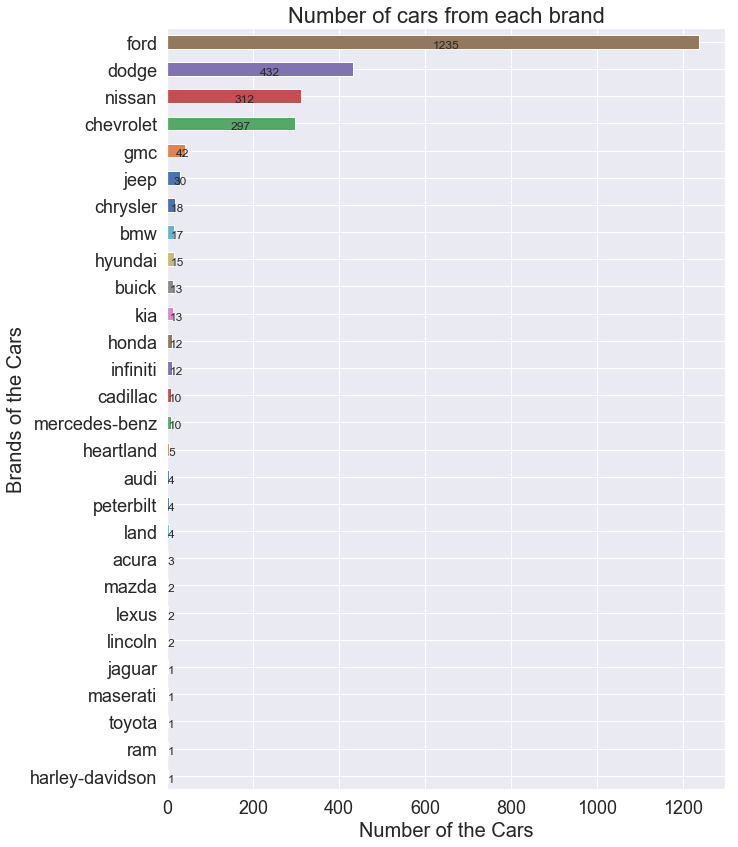

In [11]:
# Ploting frequency of brand
sns.set(style="darkgrid")
df_tmp = df_cat['brand'].value_counts().sort_values()
ax = df_tmp.plot(kind='barh',figsize=(10,14))

plt.ylabel('Brands of the Cars', fontsize=20)
plt.xlabel('Number of the Cars', fontsize=20)
plt.title('Number of cars from each brand', fontsize = 22)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)


x_offset = -0.03
y_offset = -0.47
for p,val in zip(ax.patches,df_tmp):
    b = p.get_bbox()
    val = "{}".format(val)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

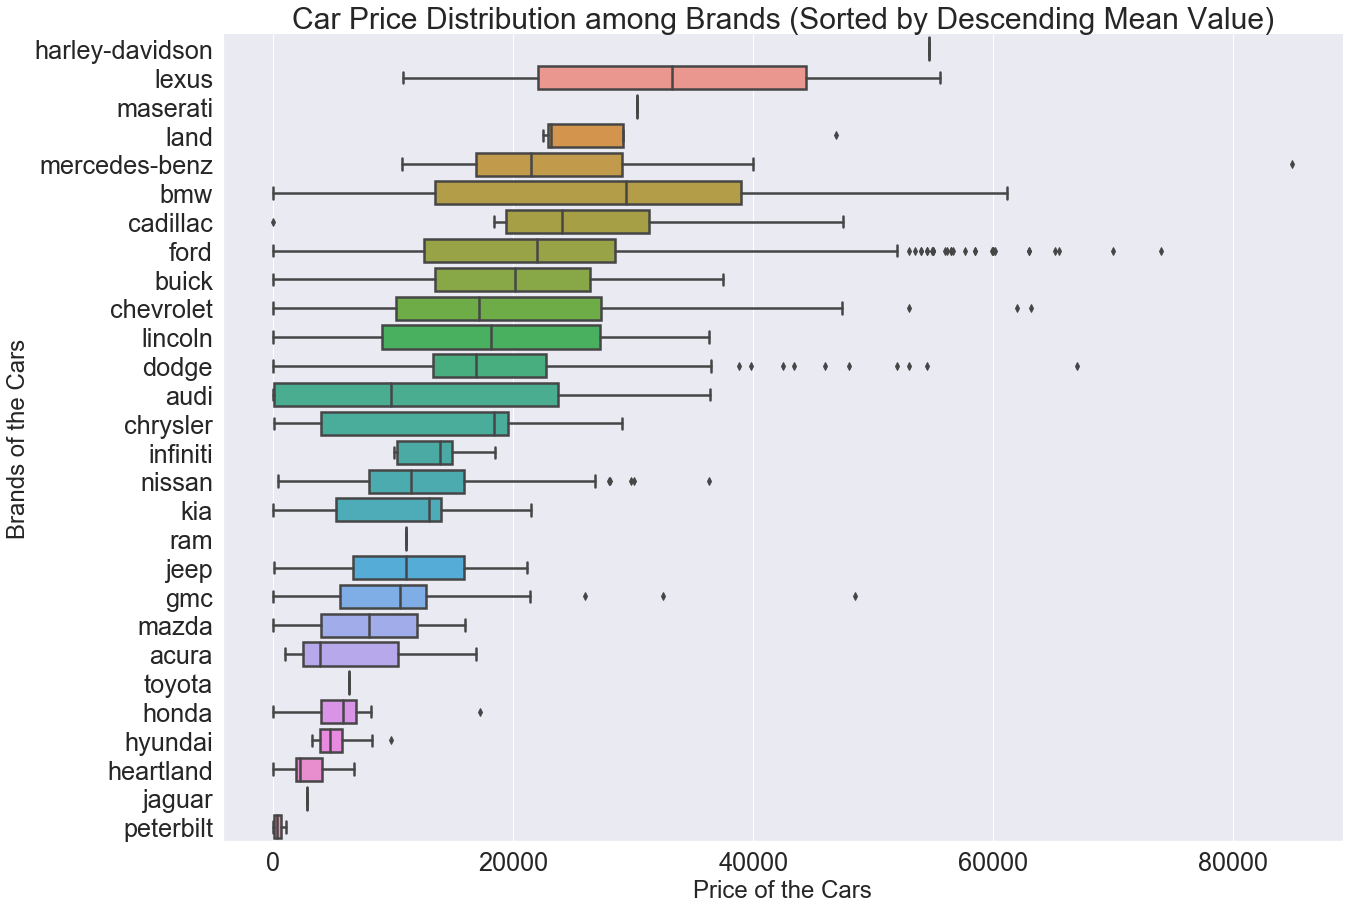

In [12]:
# Boxplotting car_price among brands, sorting by mean_price descending 
df_price_brand=data[['brand','price']] #subsetting
sort_index_brand=list(df_price_brand.groupby(['brand']).mean().sort_values(by='price',ascending=False).index) #indexing sorted values

sns.set(font_scale=2.3)
sns.catplot(y="brand",
            x="price", 
            kind="box",            
            height=13, 
            aspect=1.5,
            linewidth=2.5,
            order=sort_index_brand,
            data=df_price_brand)

plt.title('Car Price Distribution among Brands (Sorted by Descending Mean Value)',size=30)
sns.set(style="darkgrid")

plt.ylabel('Brands of the Cars', fontsize=24)
plt.xlabel('Price of the Cars', fontsize=24)

plt.show()

### 3.2 How is the mileage related to the price?

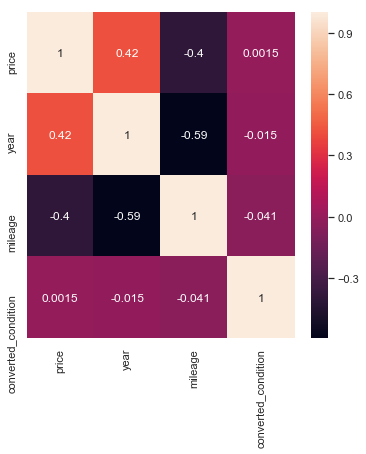

<Figure size 432x288 with 0 Axes>

In [13]:
data_price_year_mileage = data[['price','year','mileage','converted_condition']] #subsetting
data_corr=data_price_year_mileage.corr() #calculating Pearson correlation coefficient

#ploting correlation with heatmap
plt.subplots(figsize=(6,6))
sns.heatmap(data_corr,annot=True)
sns.set(font_scale=1.5) 
plt.show()
plt.savefig('corr_heatmap.png')

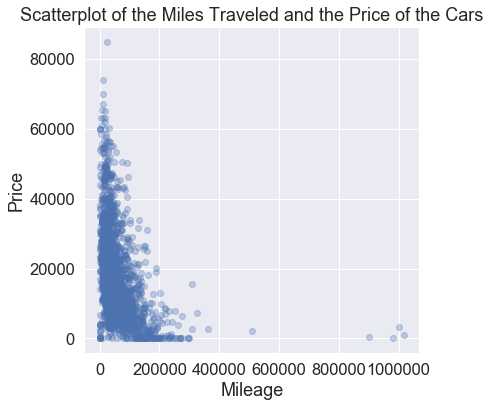

In [14]:
# scatter plot mileage vs. price
plt.figure(figsize=(6,6))
x=data_price_year_mileage['mileage']
y=data_price_year_mileage['price']


# Visualization
plt.scatter(x,y,alpha=0.3)


plt.title('Scatterplot of the Miles Traveled and the Price of the Cars')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [123]:
#eliminating outliers
df_price_mileage=data[['price','mileage']]

from scipy import stats   #import scipy library to use delete outliers function
from scipy.stats import norm

#calculate z-scores of `df_price_mileage
z_scores = stats.zscore(df_price_mileage)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  #deleting outliers
new_df = df_price_mileage[filtered_entries].copy()



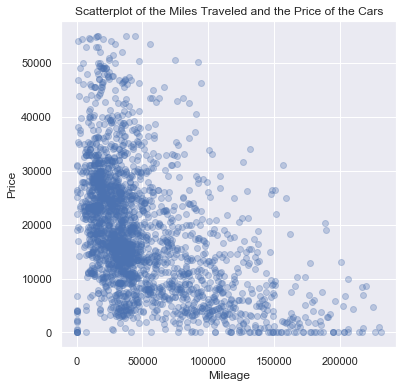

In [124]:
# scatterplot price VS. mileage on dataset new_df 
plt.figure(figsize=(6,6))
x=new_df['mileage']
y=new_df['price']

plt.scatter(x,y,alpha=0.3)
plt.title('Scatterplot of the Miles Traveled and the Price of the Cars')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [125]:
new_df.describe() #statistics of price and mileage

,price,mileage
count,2446.000000,2446.000000
mean,18512.107931,48921.922731
std,11275.321714,40869.473166
min,0.000000,0.000000
25%,10400.000000,21677.500000
50%,16900.000000,35336.000000
75%,25500.000000,61552.750000
max,55000.000000,231240.000000


In [126]:
new_df.corr() # calculating correlation on new dataset

,price,mileage
price,1.000000,-0.473141
mileage,-0.473141,1.000000


      fun: 494.63587513927416
 hess_inv: array([[ 2.66005590e-08, -1.55964693e-08],
       [-1.55964693e-08,  2.02152896e-08]])
      jac: array([0.74371338, 4.83563995])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 14
     njev: 122
   status: 2
  success: False
        x: array([ 6.14360434, -0.44722628])
[ 6.14360434 -0.44722628]


Text(0, 0.5, 'Price (log scale)')

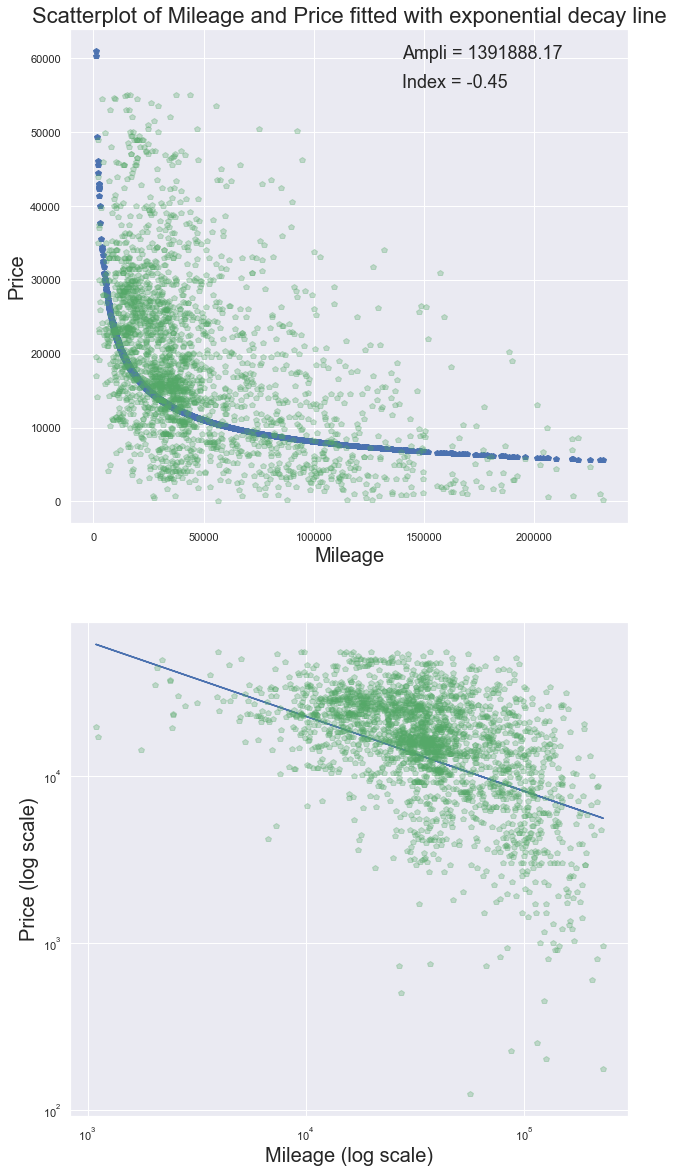

In [148]:
# fitting curve
from scipy import optimize

powerlaw = lambda x, amp, index: amp * (x**index)

logx = np.log10(x+1e-3)
logy = np.log10(y+1e-3)
#logyerr = yerr / y

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x + 0.1
costfunc = lambda p,x,y: min(errfunc(p,x,y),100000)
errfunc = lambda p, x, y: np.sum(np.abs(y - fitfunc(p, x)))

pinit = [1.0, -1.0]
out = optimize.minimize(errfunc, pinit,
                       args=(logx, logy))
print(out)
pfinal = out.x
print(pfinal)

index = pfinal[1]
amp = 10.0**pfinal[0]


# Plotting data

plt.figure(figsize=(10,20))
plt.clf()
plt.subplot(2, 1, 1)
plt.plot(x, powerlaw(x, amp, index),'p')     # Fit
plt.plot(x, y,'gp',alpha=0.3)     # Fit

plt.text(140000, 60000, 'Ampli = %5.2f' % (amp),fontsize = 18)
plt.text(140000, 56000, 'Index = %5.2f' % (index),fontsize = 18)
plt.title('Scatterplot of Mileage and Price fitted with exponential decay line',fontsize = 22)
plt.xlabel('Mileage',fontsize = 20)
plt.ylabel('Price',fontsize = 20)


plt.subplot(2, 1, 2)
plt.loglog(x, powerlaw(x, amp, index))
plt.plot(x, y,'gp',alpha=0.3)     # Fit

plt.xlabel('Mileage (log scale)',fontsize = 20)
plt.ylabel('Price (log scale)',fontsize = 20)


In [136]:
# optimizing scatterplot with fitted curve

#excluding price < 100 records
low_price_index = new_df[new_df['price']<100].index  
new_df.drop(low_price_index, inplace=True)
print(new_df.shape)

#excluding mileage < 1000 records
low_mile_index = new_df[new_df['mileage']<1000].index
new_df.drop(low_mile_index, inplace=True)
new_df.shape

(2392, 2)


(2369, 2)

In [149]:
2499-2369

130

      fun: 494.63587513927416
 hess_inv: array([[ 2.66005590e-08, -1.55964693e-08],
       [-1.55964693e-08,  2.02152896e-08]])
      jac: array([0.74371338, 4.83563995])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 14
     njev: 122
   status: 2
  success: False
        x: array([ 6.14360434, -0.44722628])
[ 6.14360434 -0.44722628]


Text(0, 0.5, 'Price (log scale)')

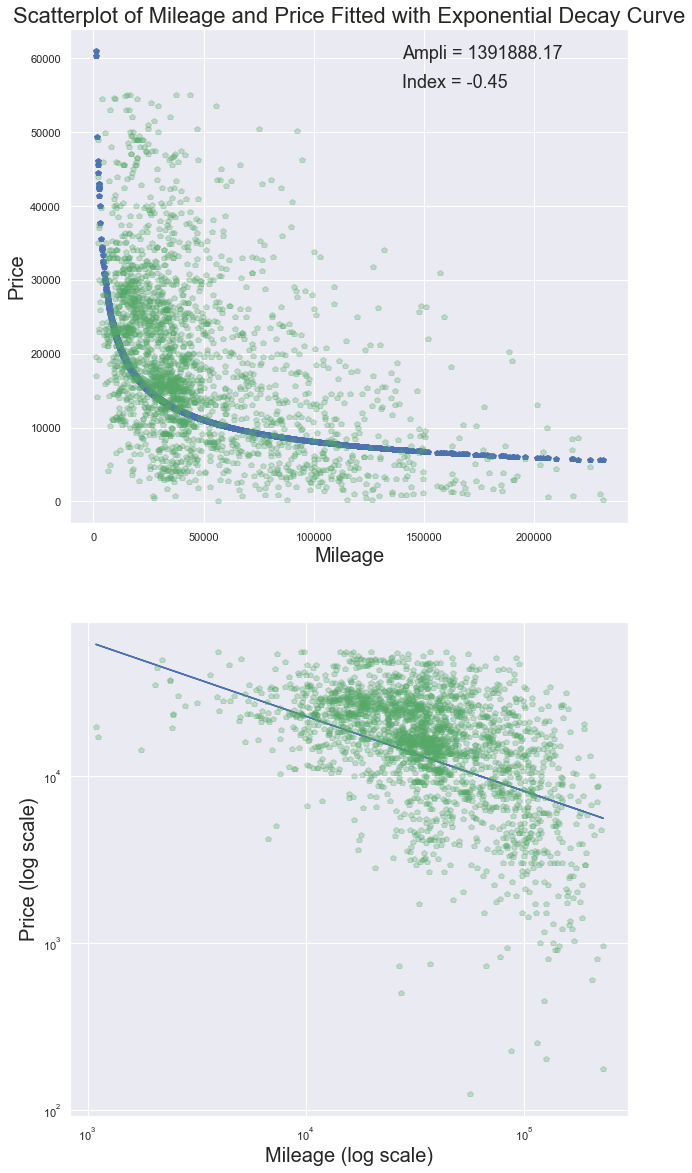

In [151]:
# fitting curve
x=new_df['mileage']
y=new_df['price']

powerlaw = lambda x, amp, index: amp * (x**index)

logx = np.log10(x+1e-3)
logy = np.log10(y+1e-3)
#logyerr = yerr / y

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x + 0.1
costfunc = lambda p,x,y: min(errfunc(p,x,y),100000)
errfunc = lambda p, x, y: np.sum(np.abs(y - fitfunc(p, x)))

pinit = [1.0, -1.0]
out = optimize.minimize(errfunc, pinit,
                       args=(logx, logy))
print(out)
pfinal = out.x
print(pfinal)

index = pfinal[1]
amp = 10.0**pfinal[0]


# Plotting data

plt.figure(figsize=(10,20))
plt.clf()
plt.subplot(2, 1, 1)
plt.plot(x, powerlaw(x, amp, index),'p')     # Fit
plt.plot(x, y,'gp',alpha=0.3)     # Fit

plt.text(140000, 60000, 'Ampli = %5.2f' % (amp),fontsize = 18)
plt.text(140000, 56000, 'Index = %5.2f' % (index),fontsize = 18)
plt.title('Scatterplot of Mileage and Price Fitted with Exponential Decay Curve',fontsize = 22)
plt.xlabel('Mileage',fontsize = 20)
plt.ylabel('Price',fontsize = 20)


plt.subplot(2, 1, 2)
plt.loglog(x, powerlaw(x, amp, index))
plt.plot(x, y,'gp',alpha=0.3)     # Fit

plt.xlabel('Mileage (log scale)',fontsize = 20)
plt.ylabel('Price (log scale)',fontsize = 20)

### 3.3 Does the color of the car affect the price?

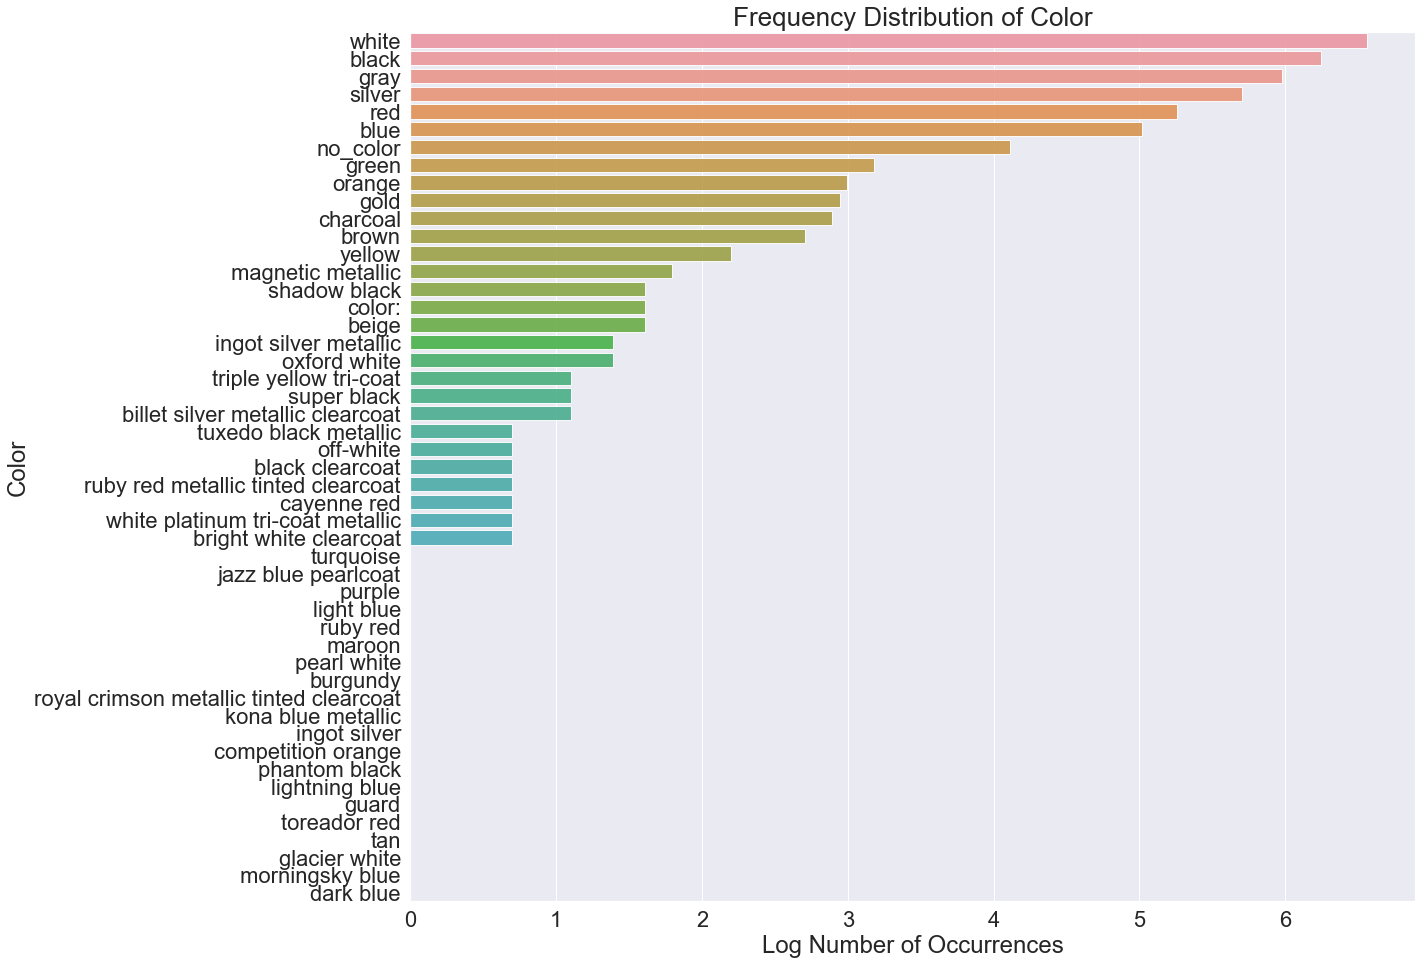

In [20]:
#Plotting color frequency

color_count = df_cat['color'].value_counts()
plt.figure(figsize=(18,16))
sns.set(style="darkgrid")

sns.barplot(np.log(color_count.values),color_count.index, alpha=0.9)
plt.title('Frequency Distribution of Color',fontsize=26)
plt.xlabel('Log Number of Occurrences', fontsize=24)

plt.ylabel('Color', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

In [21]:
df_cat['color'].value_counts()  #counting records in different colors

white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
shadow black                                 5
color:                                       5
beige                                        5
ingot silver metallic                        4
oxford white                                 4
triple yellow tri-coat                       3
super black                                  3
billet silver

In [22]:
# selecting colors with at least three records
color_at_least_three=color_count['white':'super black']
color_index=list(color_at_least_three.index)

In [23]:
df_price_color = data[['color','price']] #creating subset with only 'color' and 'price' columns 
df_price_color.head()

,color,price
0,black,6300
1,silver,2899
2,silver,5350
3,blue,25000
4,red,27700


In [24]:
df_price_color_newindex=df_price_color.loc[df_price_color['color'].isin(color_index)] #selecting colors with at least three records
df_price_color_newindex.count()

color    2462
price    2462
dtype: int64

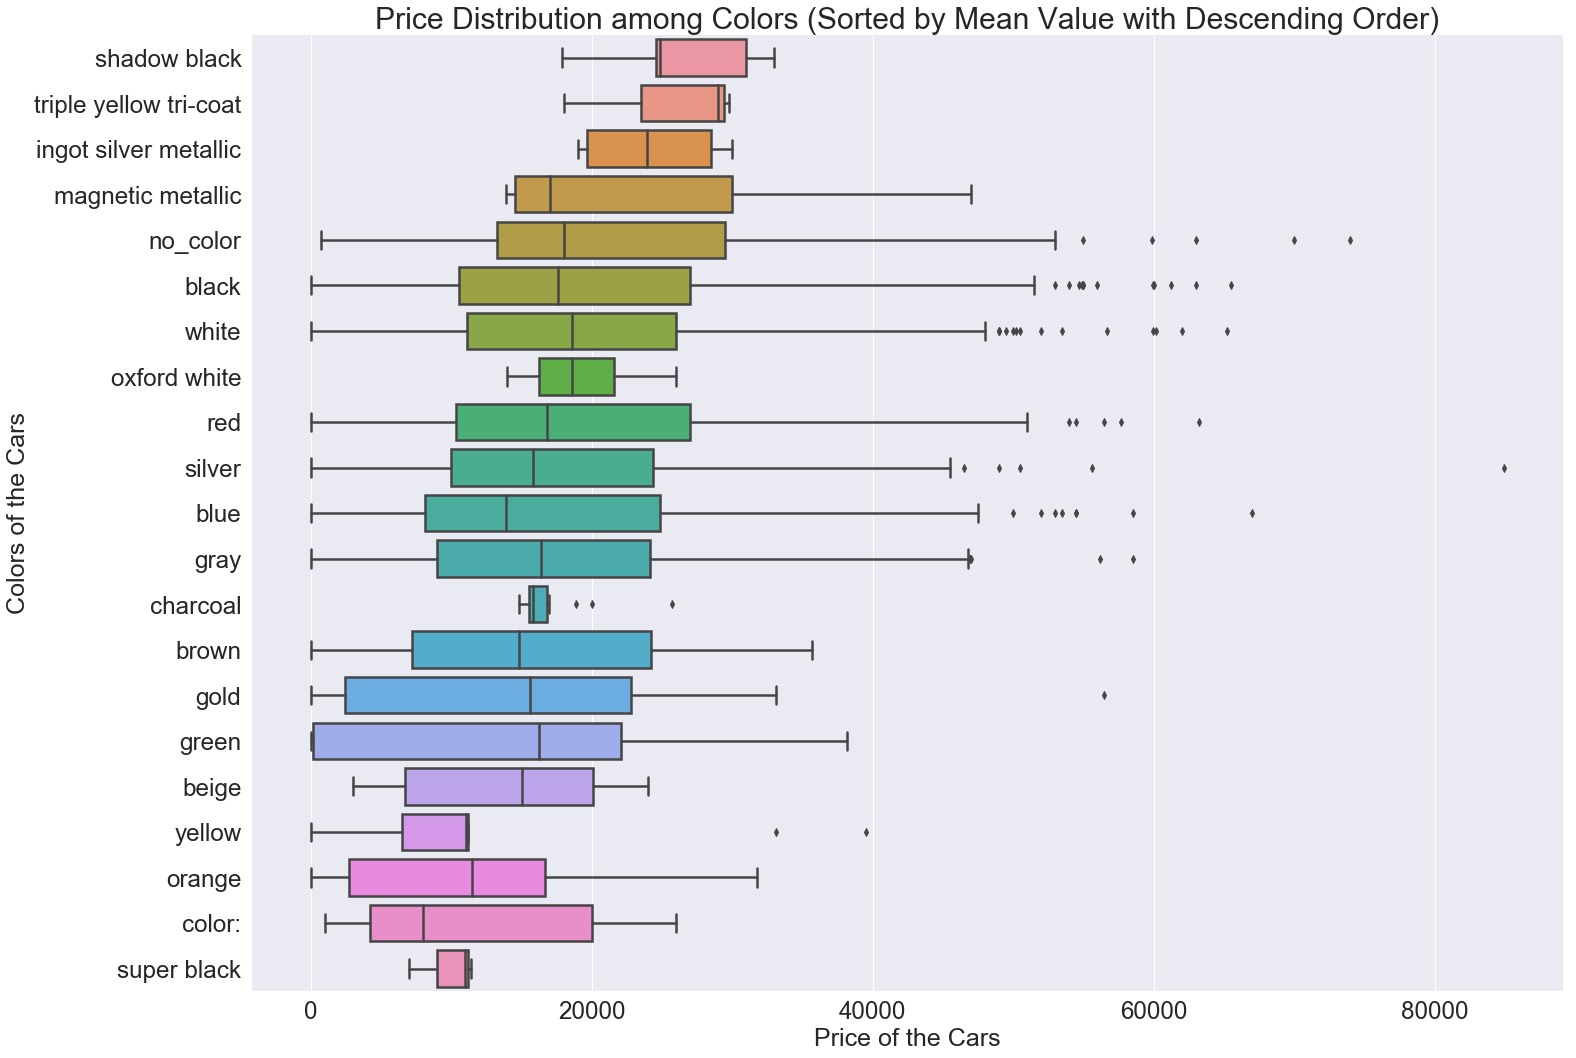

In [25]:
# Boxplotting price in each color group with mean value desending order
sort_index=list(df_price_color_newindex.groupby(['color']).mean().sort_values(by='price',ascending=False).index)

sns.set(font_scale=2.2)
sns.catplot(y="color",     
            x="price", 
            kind="box", 
            height=15, 
            aspect=1.5,
            linewidth=2.5,
            order=sort_index,
            data=df_price_color_newindex)

plt.title('Price Distribution among Colors (Sorted by Mean Value with Descending Order)',size=30) #setting title
sns.set(style="darkgrid") #setting background style

plt.ylabel('Colors of the Cars', fontsize=25) #setting ylable
plt.xlabel('Price of the Cars', fontsize=25)  #setting xlable
plt.show()

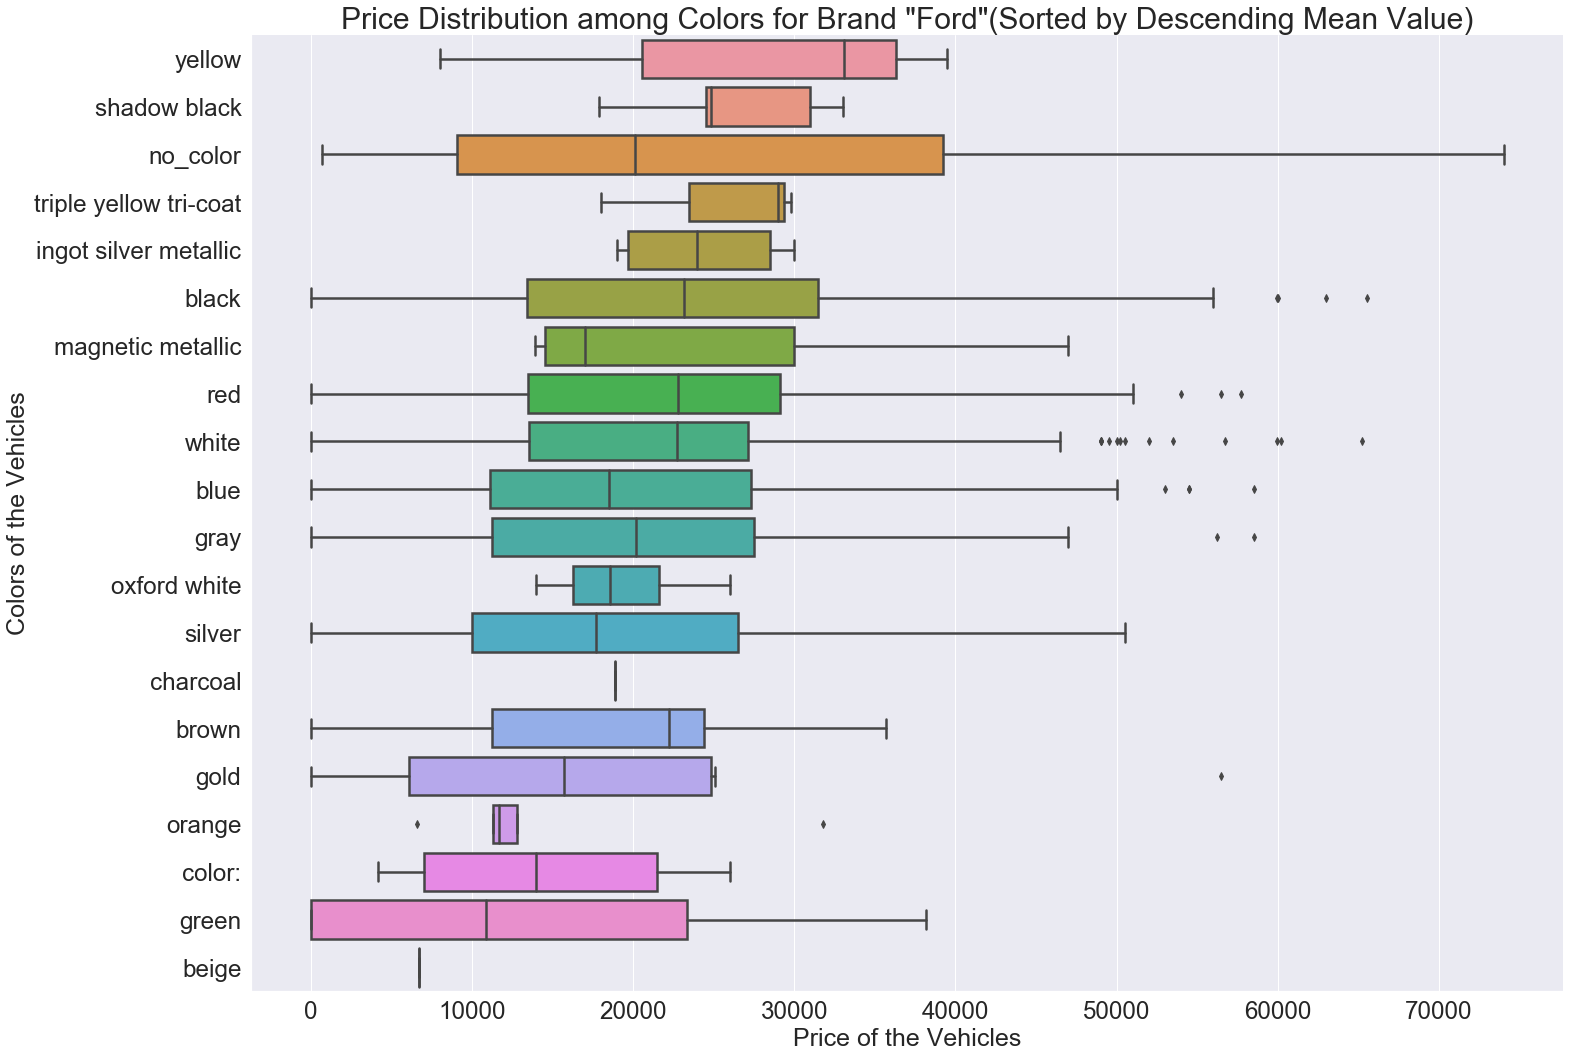

In [26]:
#boxplotting ford_car_price in different color groups with mean_price descending order
df_brand_price_color=data[['brand','price','color']] #subsetting
df_brand_price_color_newindex=df_brand_price_color.loc[df_brand_price_color['color'].isin(color_index)]

df_ford=df_brand_price_color_newindex.loc[df_brand_price_color['brand'] == 'ford'] # making subset of data for records in brand = 'ford'
sort_index=list(df_ford.groupby(['color']).mean().sort_values(by='price',ascending=False).index)

sns.set(font_scale=2.2)
sns.catplot(y="color",
            x="price", 
            kind="box", 
            height=15, 
            aspect=1.5,
            linewidth=2.5,
            order=sort_index,
            data=df_ford)

plt.title('Price Distribution among Colors for Brand "Ford"(Sorted by Descending Mean Value)',size=30)
sns.set(style="darkgrid")
plt.ylabel('Colors of the Vehicles', fontsize=25)
plt.xlabel('Price of the Vehicles', fontsize=25)
plt.show()

## 4. Modelling

In [27]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### 4.1 Model_One: linear regression model considering only numerical variables

In [28]:
data_clean.drop(data_clean.loc[data_clean['converted_condition']== -1].index, inplace=True) #deleting rows where 'condition' = -1

In [29]:
data_clean.shape #check remaining records

(2479, 10)

In [30]:
#Response variable 'price', explainatory variables 'mileage','year','converted_condition'   
X_exp = data_clean[['year', 'mileage','converted_condition']] #subsetting explainatory variables
y_resp = data_clean['price'] #subsetting response variable

In [31]:
#calling train_test_split to allocate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_exp, y_resp, test_size = .30, random_state=42)
    
#fitting linear regression model 
lm_model_one =LinearRegression(normalize=True) 
lm_model_one.fit(X_train, y_train) 
    
       
y_train_preds = lm_model_one.predict(X_train) # training set prediction
r_train = r2_score(y_train, y_train_preds) #r score of training set

y_test_preds = lm_model_one.predict(X_test) # test set prediction
r_test = r2_score(y_test, y_test_preds) # r score of test set 
    
print("train r2 score of lm_model_one: ",r_train)
print("test r2 score lm_model_one: ",r_test)
    

train r2 score of lm_model_one:  0.208238428468004
test r2 score lm_model_one:  0.20879527472358395


### 4.2 Model_Two: ElasticNet considering only numerical variables

In [32]:
# model: ElasticNet

#eleven steps:
for alpha in [1e-8,1e-7,1e-6,0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    #Instantiate
    lm_two =ElasticNet(normalize=True,alpha=alpha) 
    lm_two.fit(X_train, y_train) 
    
    y_test_preds = lm_two.predict(X_test)# Predictions here
    r_test = r2_score(y_test, y_test_preds) # Rsquared here
    
    y_train_preds = lm_two.predict(X_train)
    r_train = r2_score(y_train, y_train_preds)


    # Print r2 to see result
    
    print("alpha=",alpha)
    print("test r2 score of lm_two:",r_test)
    print("train r2 scoreof lm_two:",r_train)
    print()

alpha= 1e-08
test r2 score of lm_two: 0.20879561486875786
train r2 scoreof lm_two: 0.2082384284618909

alpha= 1e-07
test r2 score of lm_two: 0.20879867518075557
train r2 scoreof lm_two: 0.20823842785686564

alpha= 1e-06
test r2 score of lm_two: 0.20882918181724885
train r2 scoreof lm_two: 0.20823836741409685

alpha= 1e-05
test r2 score of lm_two: 0.20912472804195703
train r2 scoreof lm_two: 0.20823238272390865

alpha= 0.0001
test r2 score of lm_two: 0.2112281184874305
train r2 scoreof lm_two: 0.20768885624061162

alpha= 0.001
test r2 score of lm_two: 0.19560705198947326
train r2 scoreof lm_two: 0.1825680730787499

alpha= 0.01
test r2 score of lm_two: 0.06370079607368306
train r2 scoreof lm_two: 0.05991027865385845

alpha= 0.1
test r2 score of lm_two: 0.003424495215682666
train r2 scoreof lm_two: 0.007488243461334254

alpha= 1
test r2 score of lm_two: -0.004378949309699731
train r2 scoreof lm_two: 0.0007645395246310693

alpha= 10
test r2 score of lm_two: -0.005181577424064665
train r2 s

### 4.3 ElasticNet model considering all numeric and categorical variables

In [33]:
#esteblishing subset with only object variables
df_cat=data_clean.select_dtypes(include='object')
df_cat.columns

Index(['brand', 'model', 'title_status', 'color', 'state', 'country'], dtype='object')

In [34]:
#  the count of distinct values within the categorical features
for column in ['brand', 'model', 'title_status', 'color', 'state', 'country']:
    print(column,df_cat[column].value_counts().count())

brand 28
model 127
title_status 2
color 49
state 44
country 2


In [35]:
df_cat_replace=df_cat.copy()

In [36]:
# cat variables encoding with numeric values
for column in ['brand', 'model', 'title_status', 'color', 'state', 'country']:
    labels = df_cat_replace[column].astype('category').cat.categories.tolist()
    replace_map_comp = {column: {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    
    df_cat_replace[column].replace(replace_map_comp[column], inplace=True)
    #print(replace_map_comp)

    #print(df_cat_replace.head())

df_cat_replace.head()    



,brand,model,title_status,color,state,country
0,28,26,1,3,25,2
1,9,93,1,40,36,2
2,8,76,1,40,8,2
3,9,33,1,5,40,2
4,6,1,1,35,7,2


In [49]:
data_clean.update(df_cat_replace)
data_clean.head()
data_clean.head().to_csv("data_clean_numencoding.csv") #saving table and uploaded on Github Gist for later use in Medium Blog Post

In [38]:
data_clean.drop(data_clean.loc[data_clean['converted_condition']== -1].index, inplace=True) #deleting rows where 'condition' = -1
data_clean.shape

(2479, 10)

In [39]:
# Consider both numerical and categorical variables

X_exp = data_clean[['year', 'mileage','brand', 'model', 'title_status', 'color', 'state', 'country','converted_condition']]
y_resp = data_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X_exp, y_resp, test_size = .30, random_state=42)

#fitting linear regression model
# model: ElasticNet

#eleven steps:
for alpha in [1e-8,1e-7,1e-6,0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    #Instantiate
    lm_three =ElasticNet(normalize=True,alpha=alpha) 
    lm_three.fit(X_train, y_train) 
    
    y_test_preds = lm_three.predict(X_test)# Predictions here
    r_test = r2_score(y_test, y_test_preds) # Rsquared here
    
    y_train_preds = lm_three.predict(X_train)
    r_train = r2_score(y_train, y_train_preds)


    # Print r2 to see result
    
    print("alpha=",alpha)
    print("test r2 score of lm_three:",r_test)
    print("train r2 scoreof lm_three:",r_train)
    print()
lm_three.coef_

alpha= 1e-08
test r2 score of lm_three: 0.2927675626028473
train r2 scoreof lm_three: 0.29085755684840064

alpha= 1e-07
test r2 score of lm_three: 0.292767992304116
train r2 scoreof lm_three: 0.2908575555830899

alpha= 1e-06
test r2 score of lm_three: 0.29277220983643437
train r2 scoreof lm_three: 0.2908574292853783

alpha= 1e-05
test r2 score of lm_three: 0.29280655320370186
train r2 scoreof lm_three: 0.29084502858258376

alpha= 0.0001
test r2 score of lm_three: 0.2924664321084677
train r2 scoreof lm_three: 0.28979776086043696

alpha= 0.001
test r2 score of lm_three: 0.2631914901502186
train r2 scoreof lm_three: 0.2529440674593345

alpha= 0.01
test r2 score of lm_three: 0.0936623507706218
train r2 scoreof lm_three: 0.08822502338436689

alpha= 0.1
test r2 score of lm_three: 0.007697738450440417
train r2 scoreof lm_three: 0.011414174983329972

alpha= 1
test r2 score of lm_three: -0.003936589937017176
train r2 scoreof lm_three: 0.0011698978490011225

alpha= 10
test r2 score of lm_three: 

array([ 9.24383378e-03, -6.13005064e-07, -1.23445145e-03,  0.00000000e+00,
       -1.03611427e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00])

### 4.4 ElasticNet: categorical variables with One hot encoding

In [40]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [41]:
#one-hot encoding
df_sub = data_clean[['year','mileage','brand', 'model', 'title_status', 'color', 'state', 'country','converted_condition']]
df_sub = create_dummy_df(df_sub,['brand', 'model', 'title_status', 'color', 'state', 'country',],dummy_na=False)

In [42]:
df_sub.shape

(2479, 249)

In [43]:
# fitting ElasticNet on one-hot encoded dataset
X_exp = df_sub
y_resp = data_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X_exp, y_resp, test_size = .30, random_state=42)



#ten steps:

#Instantiate
for alpha in [1e-7,1e-6,0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    lm_four = ElasticNet(normalize=True,alpha=alpha) 
    lm_four.fit(X_train, y_train) 

    y_test_preds = lm_four.predict(X_test)# Predictions here
    y_train_preds = lm_four.predict(X_train)# Predictions here
    r_test = r2_score(y_test, y_test_preds) # Rsquared here
    r_train = r2_score(y_train, y_train_preds)

    # Print r2 to see result
    print("alpha=",alpha)
    print("test r2 score of lm_four",r_test)
    print("train r2 score of lm_four",r_train)
    print()



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31600061909.739758, tolerance: 25593274.441063974
  positive)


alpha= 1e-07
test r2 score of lm_four 0.675040382384976
train r2 score of lm_four 0.753142971417869



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31686454244.705265, tolerance: 25593274.441063974
  positive)


alpha= 1e-06
test r2 score of lm_four 0.6773733935888921
train r2 score of lm_four 0.753111137526182

alpha= 1e-05
test r2 score of lm_four 0.6767797518871486
train r2 score of lm_four 0.7522059327871314

alpha= 0.0001
test r2 score of lm_four 0.6758493070140622
train r2 score of lm_four 0.7456021497494445

alpha= 0.001
test r2 score of lm_four 0.598806160915921
train r2 score of lm_four 0.6409578644272095

alpha= 0.01
test r2 score of lm_four 0.22133590997798624
train r2 score of lm_four 0.2330020811956891

alpha= 0.1
test r2 score of lm_four 0.025716450479231878
train r2 score of lm_four 0.0315184778754275

alpha= 1
test r2 score of lm_four -0.0020842151092088645
train r2 score of lm_four 0.0032290131086384344

alpha= 10
test r2 score of lm_four -0.004981239530188919
train r2 score of lm_four 0.00028567432654946767

alpha= 100
test r2 score of lm_four -0.00525719784489409
train r2 score of lm_four 9.260492612739313e-06



### 4.5 Modelling with XGBoost

In [44]:
import xgboost as xgb

In [45]:

# fit model on training data
model_five = xgb.XGBRegressor()  
model_five.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [46]:
# make predictions for test data
y_pred = model_five.predict(X_test)


In [47]:
y_test_preds = model_five.predict(X_test)# # make predictions for test data
y_train_preds = model_five.predict(X_train)# # make predictions for train data

r_test = r2_score(y_test, y_test_preds) # r2 of test data
r_train = r2_score(y_train, y_train_preds) #r2 of train data

# Print r2 to see result
print("train r2 score of lm_five",r_train)
print("test r2 score of lm_five",r_test)


train r2 score of lm_five 0.9148179972103976
test r2 score of lm_five 0.7291313581153136
